In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_df = pd.read_csv("EXL_EQ_2020_Train_datasets.csv")
test_df = pd.read_csv("EXL_EQ_2020_Test_Datasets.csv")

In [3]:
train_df.head(5)

,cust_id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var32,var33,var34,var35,var36,var37,var38,var39,var40,self_service_platform
0,100001,2667,0,0,1768,0,4,0,2,291016,...,0,other,Inactive,Standard,Video/Internet/Voice,N,NaN,Single Housing,N,Desktop
1,100002,435,0,0,515,0,3,0,0,137667,...,0,other,Never,Standard,Video/Internet,N,NaN,Single Housing,N,Desktop
2,100003,1520,0,0,2280,0,6,0,4,301567,...,0,other,Inactive,Standard,Video/Internet/Voice,N,Agent,Single Housing,Y,Desktop
3,100004,4393,0,1,5731,0,8,1,27,436735,...,1,other,Active,Standard,Internet Only,NaN,NaN,Single Housing,N,Desktop
4,100005,3587,0,0,2493,0,7,0,7,314970,...,0,movie_channel1,Never,Standard,Internet Only,N,NaN,Multi Housing,N,STB


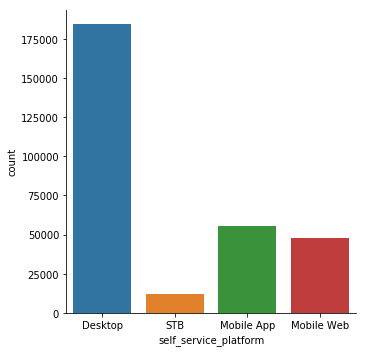

In [4]:
sns.catplot(x="self_service_platform", kind="count", data=train_df);

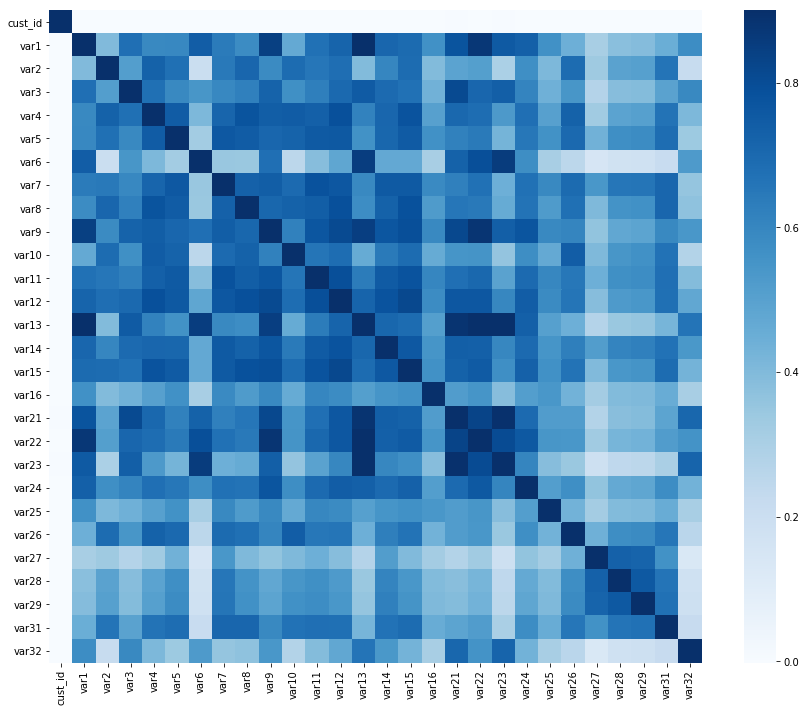

In [5]:
corr = train_df.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

In [6]:
missing_val = pd.concat([train_df.isnull().sum(), test_df.isnull().sum()], axis=1, keys=['Train', 'Test'])
missing_val[missing_val.sum(axis=1) > 0]

C:\Users\indra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Train,Test
var24,9916,10023.0
var35,0,2.0
var36,4633,4744.0
var37,19442,19433.0
var38,185152,184587.0
var39,22,12.0


In [7]:
y=train_df["self_service_platform"]
train_df=train_df.iloc[:,0:37]

In [8]:
y.head()

0    Desktop
1    Desktop
2    Desktop
3    Desktop
4        STB
Name: self_service_platform, dtype: object

In [9]:
df=pd.concat([train_df,test_df],axis=0)

In [10]:
df.shape

(600000, 37)

In [11]:
df['var37'] = df['var37'].replace({'N': 0, 'Y': 1})
df['var40'] = df['var40'].replace({'N': 0, 'Y': 1})
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))
X=df.iloc[:,0:37]

In [12]:
df.head()

,cust_id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40
0,100001,2667,0,0,1768,0,4,0,2,291016,...,0,0,other,Inactive,Standard,Video/Internet/Voice,0.0,Agent,Single Housing,0
1,100002,435,0,0,515,0,3,0,0,137667,...,0,0,other,Never,Standard,Video/Internet,0.0,Agent,Single Housing,0
2,100003,1520,0,0,2280,0,6,0,4,301567,...,0,0,other,Inactive,Standard,Video/Internet/Voice,0.0,Agent,Single Housing,1
3,100004,4393,0,1,5731,0,8,1,27,436735,...,0,1,other,Active,Standard,Internet Only,0.0,Agent,Single Housing,0
4,100005,3587,0,0,2493,0,7,0,7,314970,...,0,0,movie_channel1,Never,Standard,Internet Only,0.0,Agent,Multi Housing,0


In [39]:
X_cat=X.iloc[:,[3,6,11,14,16,21,27,28,29,30,31,32,33,34,35,36]]
X_cont=X.iloc[:,[0,1,2,4,5,7,8,9,10,12,13,15,17,18,19,20,22,23,24,25]]

In [40]:
X_cat.head()

,var3,var6,var11,var14,var16,var25,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40
0,0,4,0,0,0,0,0,0,other,Inactive,Standard,Video/Internet/Voice,0.0,Agent,Single Housing,0
1,0,3,0,0,0,0,0,0,other,Never,Standard,Video/Internet,0.0,Agent,Single Housing,0
2,0,6,0,0,0,0,0,0,other,Inactive,Standard,Video/Internet/Voice,0.0,Agent,Single Housing,1
3,1,8,0,1,0,0,0,1,other,Active,Standard,Internet Only,0.0,Agent,Single Housing,0
4,0,7,0,0,0,0,0,0,movie_channel1,Never,Standard,Internet Only,0.0,Agent,Multi Housing,0


In [41]:
from sklearn.preprocessing import LabelEncoder
label_x = LabelEncoder()

In [42]:
X_cat.iloc[:,8]=label_x.fit_transform(X_cat.iloc[:,8])
X_cat.iloc[:,9]=label_x.fit_transform(X_cat.iloc[:,9])
X_cat.iloc[:,10]=label_x.fit_transform(X_cat.iloc[:,10])
X_cat.iloc[:,11]=label_x.fit_transform(X_cat.iloc[:,11])
X_cat.iloc[:,13]=label_x.fit_transform(X_cat.iloc[:,13])
X_cat.iloc[:,14]=label_x.fit_transform(X_cat.iloc[:,14])

C:\Users\indra\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [43]:
X_cat.head()

,var3,var6,var11,var14,var16,var25,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40
0,0,4,0,0,0,0,0,0,5,2,2,9,0.0,0,4,0
1,0,3,0,0,0,0,0,0,5,3,2,7,0.0,0,4,0
2,0,6,0,0,0,0,0,0,5,2,2,9,0.0,0,4,1
3,1,8,0,1,0,0,0,1,5,0,2,1,0.0,0,4,0
4,0,7,0,0,0,0,0,0,2,3,2,1,0.0,0,2,0


In [44]:
X_cont.head()

,cust_id,var1,var2,var4,var5,var7,var8,var9,var10,var12,var13,var15,var21,var22,var23,var24,var26,var27,var28,var29
0,100001,2667,0,1768,0,0,2,291016,0,109,447,161,9,85287,27,0.0,4,153,0,0
1,100002,435,0,515,0,0,0,137667,0,17,135,34,4,60868,4,0.0,1,74,0,0
2,100003,1520,0,2280,0,0,4,301567,0,120,453,112,10,92324,26,0.0,5,133,0,0
3,100004,4393,0,5731,0,1,27,436735,1,726,797,266,33,117785,71,20.0,11,208,8,10
4,100005,3587,0,2493,0,0,7,314970,0,237,614,166,15,100083,46,33.0,6,155,0,1


In [45]:
x=np.zeros((600000,36))

In [47]:
x[:,0:20]=X_cont
x[:,20:36]=X_cat

In [61]:
x_train=x[0:300000,:]
x_test=x[300000:,:]

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_train,y,test_size=0.3,random_state=42)

In [71]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

ModuleNotFoundError: No module named 'imblearn'

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators = 350, random_state = 0)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [65]:
y_pred=rfc.predict(X_test)

In [69]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [70]:
accuracy_score(y_test, y_pred)

0.7438777777777777

In [72]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators = 350, random_state = 0)
rfc.fit(x_train,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [73]:
yt_pred=rfc.predict(x_test)

In [74]:
submission = pd.DataFrame({ "cust_id": test_df["cust_id"],
                            "self_service_platform": yt_pred })
submission.to_csv('submission.csv', index=False)